 # MENGANALISIS DATA "NIFTY-50 STOCKS DATASET"
 ## by Harun Al Rasyid (M0119040)
 ### source data = https://www.kaggle.com/iamsouravbanerjee/nifty50-stocks-dataset

# Importing Package

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math 
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:,}'.format

# Cleaning Dataset

In [ ]:
path = "/content/sample_data/National_Stock_Exchange_of_India_Ltd.csv"
df = pd.read_csv(path)
df = df.drop(columns=["Volume (lacs)",'52w H', '52w L'])
for i in df.columns :
  a = i.replace(" ","_")
  df = df.rename(columns={str(i):str(a)})
df["Open"]=df["Open"].str.replace(",","").apply(float)
df["High"]=df["High"].str.replace(",","").apply(float)
df["Low"]=df["Low"].str.replace(",","").apply(float)
df["LTP"]=df["LTP"].str.replace(",","").apply(float)
df['Turnover_(crs.)']=df['Turnover_(crs.)'].str.replace(",","").apply(float)

# Data Analysing

## Saham Big Cap India (Index NIFTY-50) diatas rata-rata (Based on Last Price) 

In [75]:
df.loc[df.LTP >= df['LTP'].mean()].sort_values(by="LTP",axis=0,ascending = False)

,Symbol,Open,High,Low,LTP,Chng,%_Chng,Turnover_(crs.),365_d_%_chng,30_d_%_chng
39,SHREECEM,"26,450.0","26,539.9","25,812.0","25,900.0",-770.5,-2.89,76.94,9.29,-6.76
32,NESTLEIND,"19,148.85","19,434.1","18,982.5","19,250.0",71.95,0.38,108.61,9.87,0.17
4,BAJAJFINSV,"17,200.0","17,237.2","16,610.0","16,684.0",-684.85,-3.94,576.79,91.38,-9.1
47,ULTRACEMCO,"7,550.0","7,599.0","7,370.1","7,398.45",-210.35,-2.76,198.32,53.5,1.78
31,MARUTI,"7,520.0","7,520.0","7,130.0","7,150.0",-422.5,-5.58,840.81,1.34,-2.02
5,BAJFINANCE,"7,021.0","7,047.9","6,775.0","6,780.0",-345.8,-4.85,"1,161.63",44.57,-13.69
11,DIVISLAB,"4,770.0","5,077.7","4,756.75","4,940.0",140.2,2.92,775.37,42.39,-1.57
12,DRREDDY,"4,580.0","4,820.0","4,576.15","4,750.0",158.4,3.45,508.97,-1.17,1.8
8,BRITANNIA,"3,560.0","3,635.1","3,533.95","3,566.6",-6.8,-0.19,133.23,0.3,-3.42
44,TCS,"3,425.0","3,490.0","3,411.9","3,439.2",-6.7,-0.19,670.58,27.32,-1.25


## Saham Paling *liquid* dan Kurang *liquid* (Based on *Turnover* )

In [76]:
df[(df["Turnover_(crs.)"] == df["Turnover_(crs.)"].max()) + (df["Turnover_(crs.)"] == df["Turnover_(crs.)"].min())] #Paling dan kurang liquid

/usr/local/lib/python3.7/dist-packages/pandas/core/computation/expressions.py:204: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  f"evaluating in Python space because the {repr(op_str)} "


,Symbol,Open,High,Low,LTP,Chng,%_Chng,Turnover_(crs.),365_d_%_chng,30_d_%_chng
39,SHREECEM,"26,450.0","26,539.9","25,812.0","25,900.0",-770.5,-2.89,76.94,9.29,-6.76
42,TATAMOTORS,486.0,486.75,458.0,459.4,-33.35,-6.77,"2,430.36",167.95,-9.68


## Saham Naik & Turun (YTD)

In [12]:
df[df["365_d_%_chng"] >= 0].sort_values(by="365_d_%_chng",axis=0) #Naik Dalam 1 Tahun

,Symbol,Open,High,Low,LTP,Chng,%_Chng,Turnover_(crs.),365_d_%_chng,30_d_%_chng
8,BRITANNIA,"3,560.0","3,635.1","3,533.95","3,566.6",-6.8,-0.19,133.23,0.3,-3.42
18,HDFCLIFE,685.0,689.0,667.1,669.75,-19.05,-2.77,151.4,0.7,-2.94
31,MARUTI,"7,520.0","7,520.0","7,130.0","7,150.0",-422.5,-5.58,840.81,1.34,-2.02
35,POWERGRID,204.05,204.95,200.8,202.5,-1.75,-0.86,195.09,3.69,6.36
28,KOTAKBANK,"2,002.0","2,007.0","1,955.1","1,960.0",-75.1,-3.69,522.52,5.24,-11.35
23,INDUSINDBK,951.0,956.95,898.0,899.95,-59.35,-6.19,622.74,5.25,-22.08
17,HDFCBANK,"1,500.0","1,506.7","1,485.0","1,489.5",-36.45,-2.39,"1,394.1",6.18,-9.88
39,SHREECEM,"26,450.0","26,539.9","25,812.0","25,900.0",-770.5,-2.89,76.94,9.29,-6.76
3,BAJAJ-AUTO,"3,370.0","3,383.5","3,320.0","3,335.0",-56.7,-1.67,114.59,9.3,-12.05
21,HINDUNILVR,"2,344.0","2,365.0","2,325.2","2,340.9",-8.15,-0.35,572.85,9.6,-3.94


In [ ]:
df[df["365_d_%_chng"] <= 0] #Saham Turun dalam 1 tahun

,Symbol,Open,High,Low,LTP,Chng,%_Chng,Turnover_(crs.),365_d_%_chng,30_d_%_chng
7,BPCL,397.15,397.2,375.0,377.4,-22.7,-5.67,383.54,-1.22,-12.45
12,DRREDDY,"4,580.0","4,820.0","4,576.15","4,750.0",158.4,3.45,508.97,-1.17,1.8
13,EICHERMOT,"2,495.0","2,506.1","2,421.5","2,440.75",-79.65,-3.16,136.56,-5.95,-5.77
19,HEROMOTOCO,"2,580.0","2,589.7","2,505.15","2,526.8",-67.9,-2.62,174.04,-16.02,-6.43


In [65]:
df[(df["365_d_%_chng"] == df["365_d_%_chng"].max()) + (df["365_d_%_chng"] == df["365_d_%_chng"].min())] 

/usr/local/lib/python3.7/dist-packages/pandas/core/computation/expressions.py:204: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  f"evaluating in Python space because the {repr(op_str)} "


,Symbol,Open,High,Low,LTP,Chng,%_Chng,Turnover_(crs.),365_d_%_chng,30_d_%_chng
19,HEROMOTOCO,"2,580.0","2,589.7","2,505.15","2,526.8",-67.9,-2.62,174.04,-16.02,-6.43
42,TATAMOTORS,486.0,486.75,458.0,459.4,-33.35,-6.77,"2,430.36",167.95,-9.68


In [66]:
df[df["365_d_%_chng"] == df["365_d_%_chng"].max()] #Grow paling besar 1 tahun

,Symbol,Open,High,Low,LTP,Chng,%_Chng,Turnover_(crs.),365_d_%_chng,30_d_%_chng
42,TATAMOTORS,486.0,486.75,458.0,459.4,-33.35,-6.77,"2,430.36",167.95,-9.68


In [13]:
df[df["365_d_%_chng"] == df["365_d_%_chng"].min()] #Best Looser

,Symbol,Open,High,Low,LTP,Chng,%_Chng,Turnover_(crs.),365_d_%_chng,30_d_%_chng
19,HEROMOTOCO,"2,580.0","2,589.7","2,505.15","2,526.8",-67.9,-2.62,174.04,-16.02,-6.43


## Saham Naik & Turun (Monthly)

In [79]:
df[df["30_d_%_chng"] == df["30_d_%_chng"].max()] #Grow Paling Besar

,Symbol,Open,High,Low,LTP,Chng,%_Chng,Turnover_(crs.),365_d_%_chng,30_d_%_chng
35,POWERGRID,204.05,204.95,200.8,202.5,-1.75,-0.86,195.09,3.69,6.36


In [80]:
df[df["30_d_%_chng"] == df["30_d_%_chng"].min()] #Menurun paling baesar

,Symbol,Open,High,Low,LTP,Chng,%_Chng,Turnover_(crs.),365_d_%_chng,30_d_%_chng
23,INDUSINDBK,951.0,956.95,898.0,899.95,-59.35,-6.19,622.74,5.25,-22.08


In [81]:
x = df[df["30_d_%_chng"] >= 0] #Grow Naik
x

,Symbol,Open,High,Low,LTP,Chng,%_Chng,Turnover_(crs.),365_d_%_chng,30_d_%_chng
1,ASIANPAINT,"3,101.0","3,167.35","3,091.0","3,138.0",-6.25,-0.2,322.53,45.66,5.66
6,BHARTIARTL,763.0,763.0,733.1,735.85,-29.3,-3.83,830.06,58.55,5.7
9,CIPLA,892.0,976.05,890.65,965.0,65.05,7.23,"1,380.9",31.89,6.34
12,DRREDDY,"4,580.0","4,820.0","4,576.15","4,750.0",158.4,3.45,508.97,-1.17,1.8
32,NESTLEIND,"19,148.85","19,434.1","18,982.5","19,250.0",71.95,0.38,108.61,9.87,0.17
35,POWERGRID,204.05,204.95,200.8,202.5,-1.75,-0.86,195.09,3.69,6.36
47,ULTRACEMCO,"7,550.0","7,599.0","7,370.1","7,398.45",-210.35,-2.76,198.32,53.5,1.78


# Visualisasi

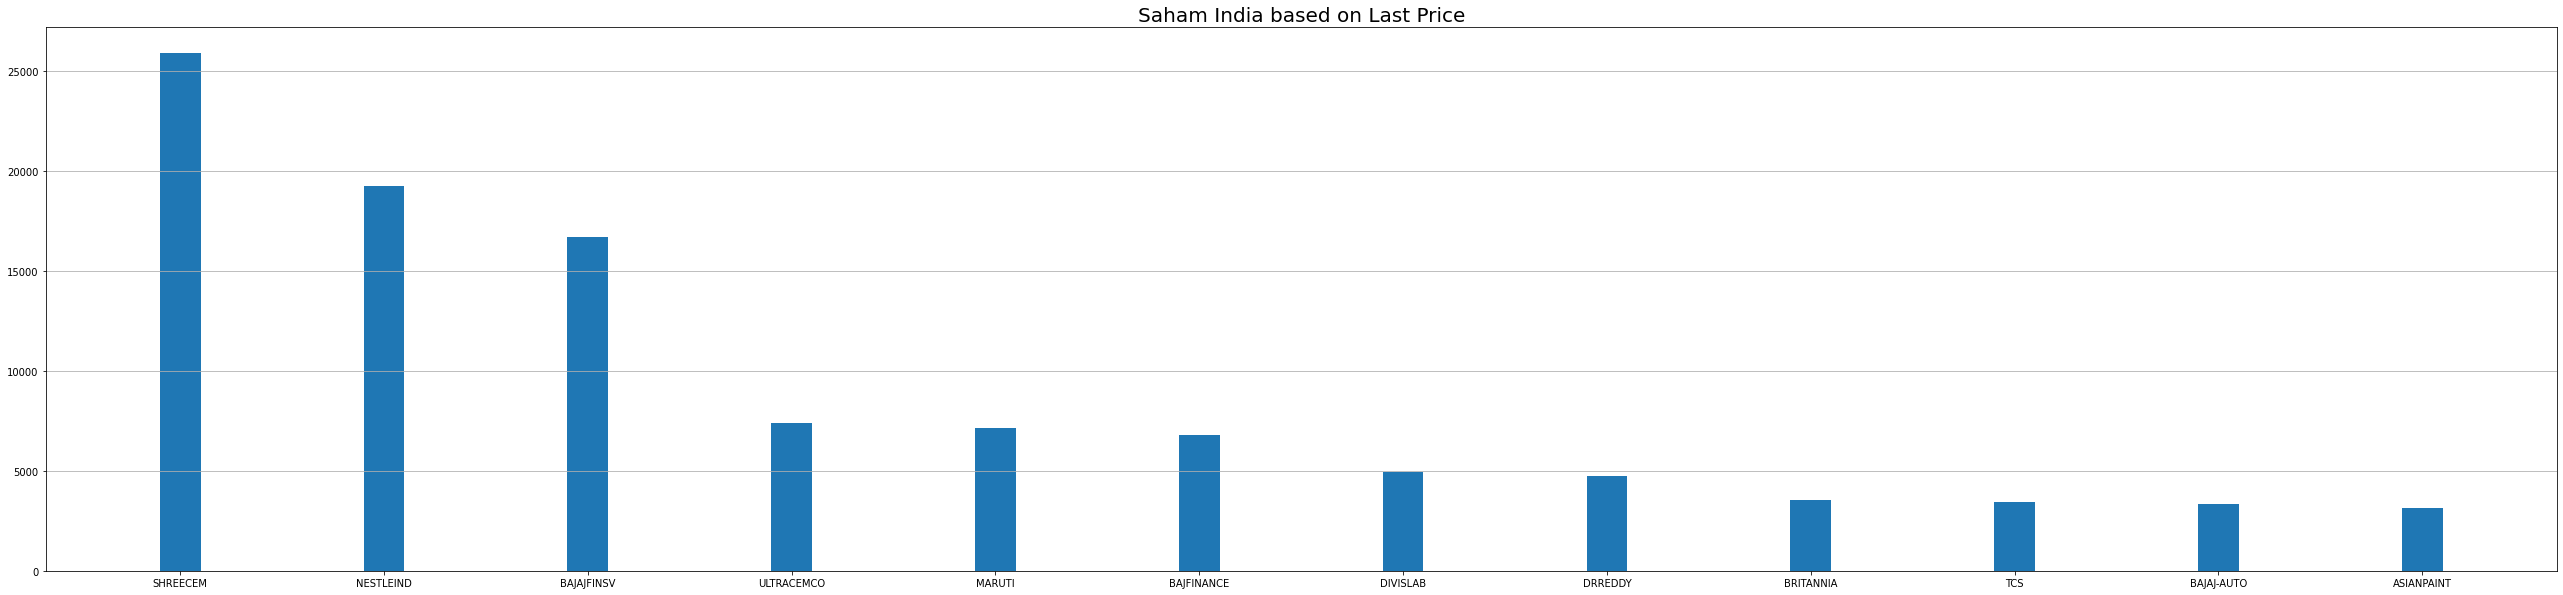

In [82]:
zo = df.loc[df.LTP >= df['LTP'].mean()].sort_values(by="LTP",axis=0,ascending = False)

fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = (20, 10)
ax.bar(x=zo["Symbol"],height = zo["LTP"],width=0.2)
plt.grid(axis="y")
plt.title("Saham India based on Last Price",{'fontsize': 20})
plt.show()

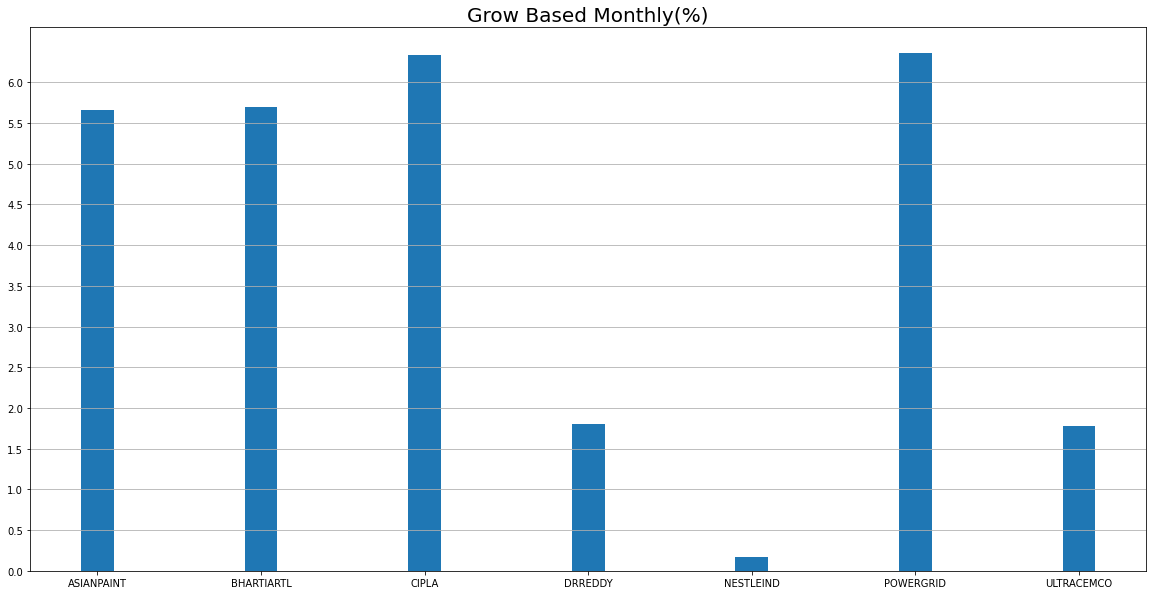

In [52]:
fig1, ax1 = plt.subplots()
plt.rcParams['figure.figsize'] = (20, 10)
ax1.bar(x=x["Symbol"],height = x["30_d_%_chng"],width=0.2)
plt.grid(axis="y")
plt.yticks(np.arange(0, x["30_d_%_chng"].max(), 0.5))  # Set label locations.
plt.title("Grow Based Monthly(%)",{'fontsize': 20})
plt.show()

In [74]:
x.sort_values(by="Turnover_(crs.)",ascending=False)

,Symbol,Open,High,Low,LTP,Chng,%_Chng,Turnover_(crs.),365_d_%_chng,30_d_%_chng
9,CIPLA,892.0,976.05,890.65,965.0,65.05,7.23,"1,380.9",31.89,6.34
6,BHARTIARTL,763.0,763.0,733.1,735.85,-29.3,-3.83,830.06,58.55,5.7
12,DRREDDY,"4,580.0","4,820.0","4,576.15","4,750.0",158.4,3.45,508.97,-1.17,1.8
1,ASIANPAINT,"3,101.0","3,167.35","3,091.0","3,138.0",-6.25,-0.2,322.53,45.66,5.66
47,ULTRACEMCO,"7,550.0","7,599.0","7,370.1","7,398.45",-210.35,-2.76,198.32,53.5,1.78
35,POWERGRID,204.05,204.95,200.8,202.5,-1.75,-0.86,195.09,3.69,6.36
32,NESTLEIND,"19,148.85","19,434.1","18,982.5","19,250.0",71.95,0.38,108.61,9.87,0.17


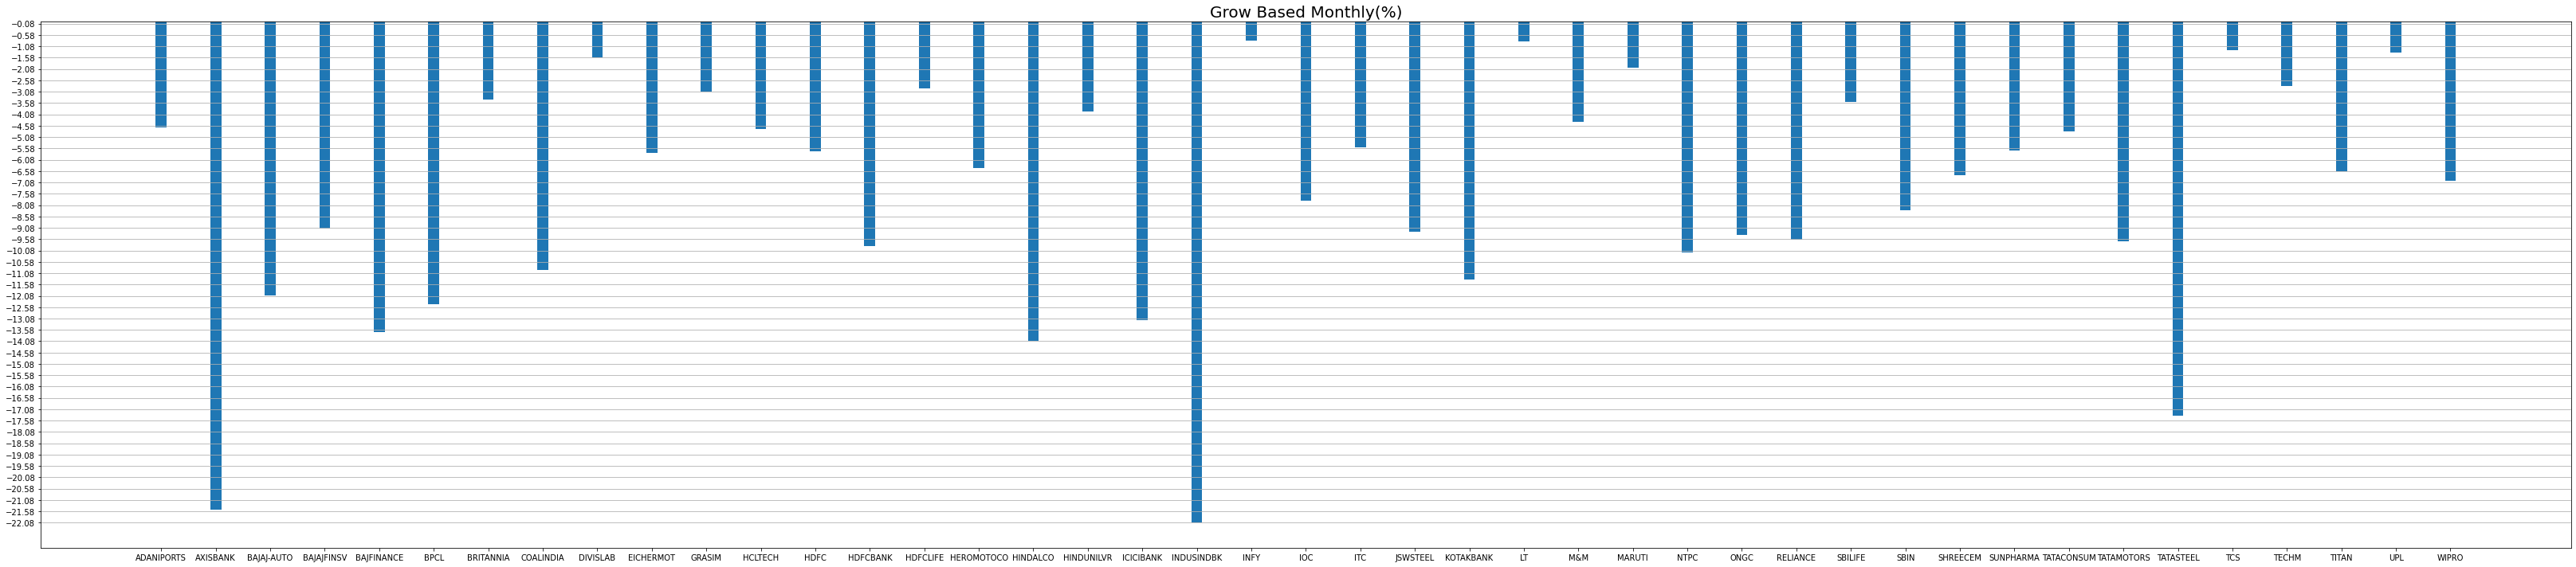

In [78]:
z = df[df["30_d_%_chng"] <= 0] #Grow Naik
fig1, ax1 = plt.subplots()
plt.rcParams['figure.figsize'] = (45, 10)
ax1.bar(x=z["Symbol"],height = z["30_d_%_chng"],width=0.2)
plt.grid(axis="y")
plt.yticks(np.arange(z["30_d_%_chng"].min(),0, 0.5))  # Set label locations.
plt.title("Grow Based Monthly(%)",{'fontsize': 20})
plt.tight_layout()
plt.show()